# Preliminary Analysis
First we will import the data.

In [1]:
import pandas as pd
import numpy as np

train_file = 'data/train.csv'
test_file = 'data/test.csv'

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

Now we will do some basic analyses on the data to get a better understanding of it.

In [2]:
salesMean = train['SalePrice'].mean()
salesMedian = train['SalePrice'].median()
#salesMode = train['SalePrice'].mode()
salesMin = train['SalePrice'].min()
salesMax = train['SalePrice'].max()

print("Basic Sale Price Statistics:")
print("Mean:\t$" + str(round(salesMean)))
print("Median:\t$" + str(round(salesMedian)))
#print("Mode:\t$" + str(round(salesMode)))
print("Range:\t$" + str(salesMin) + "-$" + str(salesMax))

Basic Sale Price Statistics:
Mean:	$180921
Median:	$163000
Range:	$34900-$755000


We will now create some visualizations to better understand the dataset

In [3]:
# this makes graph generation work
%matplotlib inline

# importing the necessary libraries for visualizations
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# general visualization configurations
sns.set(color_codes=True)
#sns.set(rc={'figure.figsize':(11,5)})

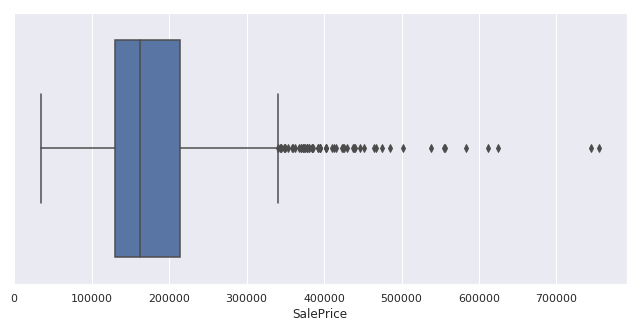

In [5]:
# Box and whisker plot of SalePrice
plt.figure(figsize=(11,5))

box_plot_saleprice = sns.boxplot(x=train['SalePrice'])

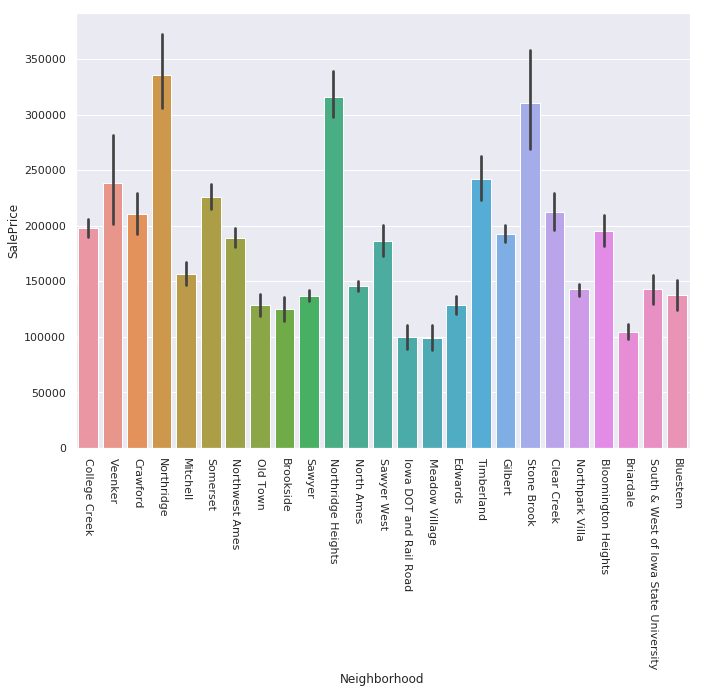

In [6]:
# swarm plot for neighborhoods, colored according to sale price
plt.figure(figsize=(11,8))

# obtained from the data_description.txt file included in the data
neighborhood_map = {"Blmngtn":"Bloomington Heights",
    "Blueste":"Bluestem",
    "BrDale":"Briardale",
    "BrkSide":"Brookside",
    "ClearCr":"Clear Creek",
    "CollgCr":"College Creek",
    "Crawfor":"Crawford",
    "Edwards":"Edwards",
    "Gilbert":"Gilbert",
    "IDOTRR":"Iowa DOT and Rail Road",
    "MeadowV":"Meadow Village",
    "Mitchel":"Mitchell",
    "Names":"North Ames",
    "NoRidge":"Northridge",
    "NPkVill":"Northpark Villa",
    "NridgHt":"Northridge Heights",
    "NWAmes":"Northwest Ames",
    "OldTown":"Old Town",
    "SWISU":"South & West of Iowa State University",
    "Sawyer":"Sawyer",
    "SawyerW":"Sawyer West",
    "Somerst":"Somerset",
    "StoneBr":"Stone Brook",
    "Timber":"Timberland",
    "Veenker":"Veenker"}

# this is to accound for values in the dataset where the capitalization is inconsistent
import copy
n_copy = copy.deepcopy(neighborhood_map)

for i in n_copy.keys():
    neighborhood_map[i.lower()] = n_copy[i]

barplot_neighborhoods_saleprice = sns.barplot(x='Neighborhood', y='SalePrice', data=train)
new_labels = [neighborhood_map[i.get_text().lower()] for i in barplot_neighborhoods_saleprice.get_xticklabels()]
_ = barplot_neighborhoods_saleprice.set_xticklabels(new_labels, rotation=-90)

In [7]:
# here are the neighborhoods and their frequencies in the dataset 
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Text(0, 0.5, 'Sale Price')

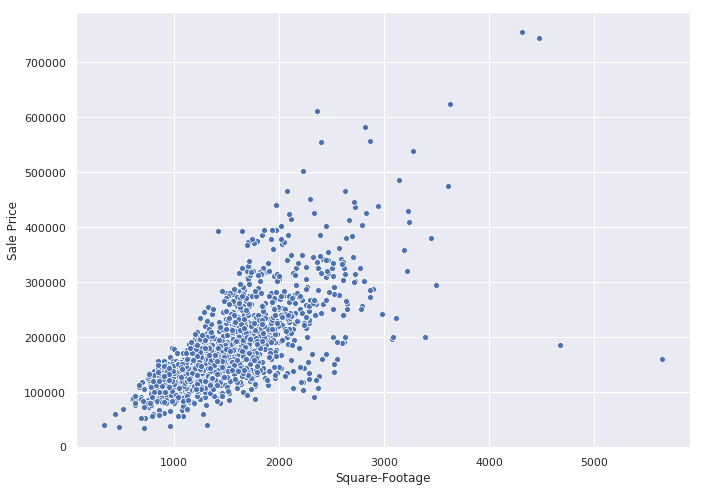

In [8]:
# scatter plot of sale price as a function of square-footage of the house
# the square-footage of the house is represented by the feature 'GrLivArea', indicating the total square-footage of all
# living space above grade (above the ground), meaning that basements are not counted.
plt.figure(figsize=(11,8))

scatterplot_sqft_saleprice = sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.xlabel('Square-Footage')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

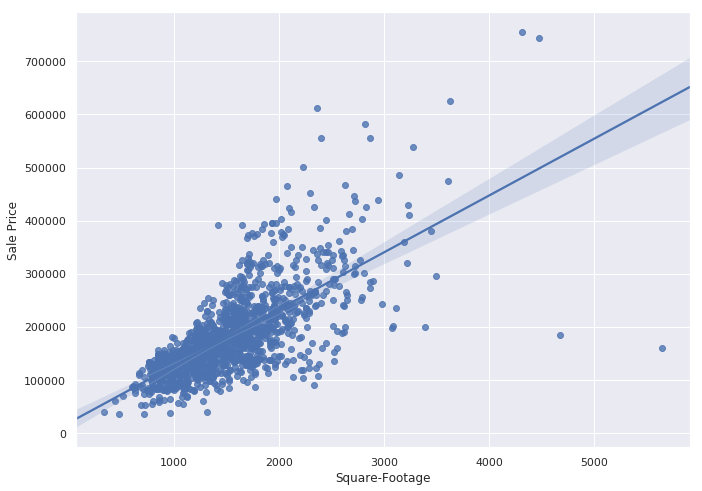

In [9]:
# the same scatter plot as above, except with a trendline. A regression plot.
plt.figure(figsize=(11,8))

regplot_sqft_saleprice = sns.regplot(x='GrLivArea', y='SalePrice', data=train)
plt.xlabel('Square-Footage')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

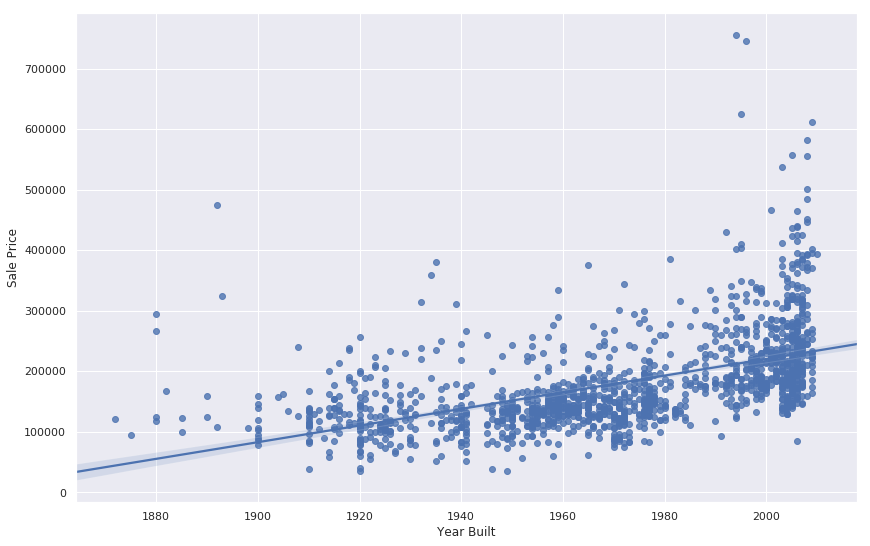

In [21]:
# regression plot of sale price as a function of construction year
plt.figure(figsize=(14,9))

regplot_buildyr_saleprice = sns.regplot(x='YearBuilt', y='SalePrice', data=train)
#regplot_renoyr_saleprice = sns.regplot(x='YearRemodAdd', y='SalePrice', data=train)
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

In [27]:
train['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64